In [1]:
import os
import glob
import datetime
import numpy as np
from astropy.io import fits
from photutils import DAOStarFinder, CircularAperture
import photutils.psf
import matplotlib.pyplot as plt
from astropy.visualization import LogStretch, AsinhStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy.signal import peak_widths
import astropy.units as u
import pandas as pd
from scipy import stats
from calibFuncs import * #sortData, starLocate, nircEPSF, calcBinDist

In [2]:
datadir = 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\William\\trapezium_data\\clio_astro\\reduced'
Clio_datasets = sortData(datadir)

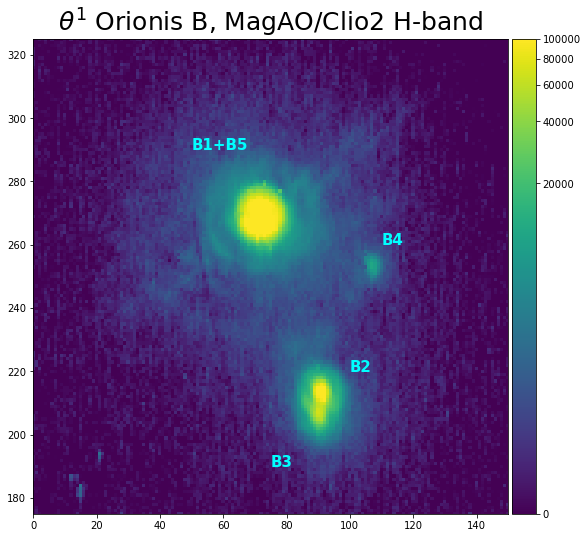

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.figure(figsize=(9,9))
ax = plt.gca()
im = ax.imshow(fits.getdata(Clio_datasets[0][12][0]), norm=ImageNormalize(stretch=AsinhStretch(a=0.01), vmin=0, vmax=100000), origin='lower')
ax.set_xlim(0,150)
ax.set_ylim(175,325)
plt.annotate(xy=[50,290], s='B1+B5', c='cyan', size=15, weight='bold')
plt.annotate(xy=[110,260], s='B4', c='cyan', size=15, weight='bold')
plt.annotate(xy=[100,220], s='B2', c='cyan', size=15, weight='bold')
plt.annotate(xy=[75,190], s='B3', c='cyan', size=15, weight='bold')
plt.title(r'$\theta^1$ Orionis B, MagAO/Clio2 H-band', size=25)
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.savefig('tet1oriB_Clio.png', dpi=150, transparent=True)

In [4]:
# 0: baades 1, 11
# 1: baades H 1, 5
# 2: Trap 127 - blank
# 3: trap31 1, 6 - good 2019-11-06
# 4: trap33 1, 6 - good 2019-11-06
# 5: Trap33 36 - blank
# 6: trap39 1, 6 - good 2019-11-06
# 7: trapb1 1, 3 - bad
# 8: trapbrg 1, 6 - good 2019-11-06
# 9: Trapcal 12 - blank
# 10: Trapezium 1, 6 - need less coadding (do indiv imgs) 2014-04-11
# 11: Trapezium 41, 46 - need less coadding 2014-04-11
# 12: traph 1, 6 - good 2019-11-06
# 13: trapj 1, 6 - good 2019-11-06
# 14: trapks 1, 6 - good 2019-11-06
# 15: TrapK 1, 21 - need less coadding 2014-11-17
# 16: TrapK 34, 54, 74 - need less coadding 2014-11-17 
# 17: TrapL 1, 11 - need less coadding (good for distor map) 2014-11-17
# 18: trapl 1, 6 - good 2019-11-06
# 19: trapm 1, 6 - good 2019-11-06
# 20: TrapM 238 - blank
# 21: Trap 1, 6, 11 - bad
goodClioTrap = Clio_datasets[0][3:5]+Clio_datasets[0][6:7]+Clio_datasets[0][8:9]+Clio_datasets[0][12:15]+Clio_datasets[0][18:20]

Choose a reference star image to create a reference PSF from


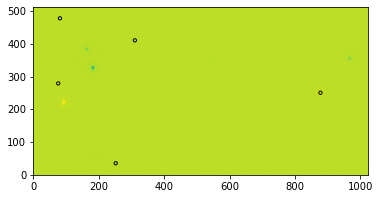

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
 251.5540813800271 34.799747916278804 0.14282819667609484
 877.6731105391011  250.3224219236255 0.08791835484093252
 75.56383756301562  279.0272569502783 0.18421073288243234
310.11690057181943  410.7997597526427 0.11857120688909838
 80.78321687230701 478.23372332159863 0.18378101545760858
input the 0 indexed integer of your target from the table above: 2
target star is at  75 , 279  at FWHM 10.117271835586209


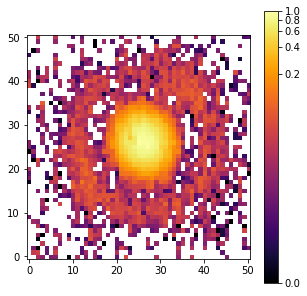

Select your target system to fit positions to


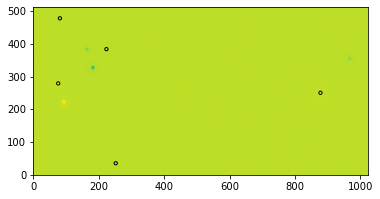

    xcentroid         ycentroid           roundness     
----------------- ------------------ -------------------
251.5540813800271 34.799747916278804 0.14282819667609484
877.6731105391011  250.3224219236255 0.08791835484093252
75.56383756301562  279.0272569502783 0.18421073288243234
  223.08966202339 383.74528008052386 0.16141138214603848
80.78321687230701 478.23372332159863 0.18378101545760858
input the 0 indexed integer of your target from the table above: 2
target star is at  75 , 279  at FWHM 10.117271835586209
Stars found at positions
       x_0                y_0       
------------------ -----------------
38.084310853122304 38.20405297722187
found fewer than 2 stars! re-enter threshold? >10
Stars found at positions
       x_0               y_0        
----------------- ------------------
67.46842445401207 15.057924421059417
       x_0                y_0       
------------------ -----------------
38.084310853122304 38.20405297722187

38.71907241425062 +/- 1.0521914264090788
52.

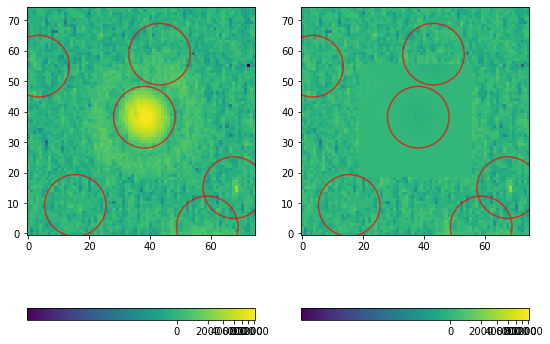

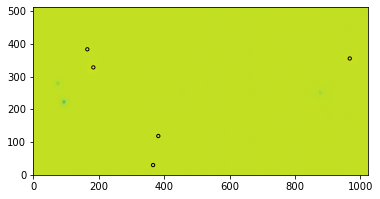

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
365.80351142666336   29.1874655228224 0.18057214387993398
 381.7509508483219 118.10214239222299 0.19298662842443776
182.99711976195275  328.0395504179779 0.11466275873209612
 967.3142645779703 355.29631224863465 0.09337965274462219
164.58822501636965 383.32023914864214 0.14594681335274198
input the 0 indexed integer of your target from the table above: 4
target star is at  164 , 383  at FWHM 9.376772431092576


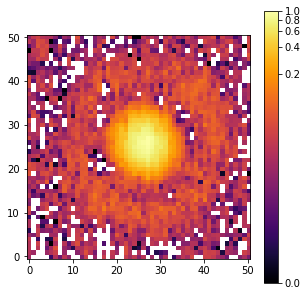

Select your target system to fit positions to


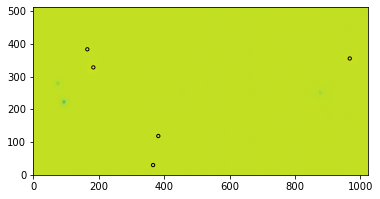

    xcentroid          ycentroid           roundness     
------------------ ------------------ -------------------
365.80351142666336   29.1874655228224 0.18057214387993398
 381.7509508483219 118.10214239222299 0.19298662842443776
182.99711976195275  328.0395504179779 0.11466275873209612
 967.3142645779703 355.29631224863465 0.09337965274462219
164.58822501636965 383.32023914864214 0.14594681335274198
input the 0 indexed integer of your target from the table above: 2
target star is at  182 , 328  at FWHM 9.830151501972693
Stars found at positions
       x_0               y_0        
----------------- ------------------
38.84456991727128 36.130477266282185
       x_0               y_0        
----------------- ------------------
37.51088560668755 28.057636131845065

9.024880128668782 +/- 0.22819607157757785
167.17759656577977 +/- 1.2635713040610597


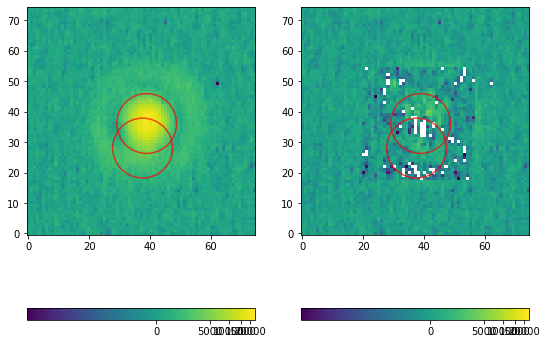

In [37]:
data_frames = []
for dataset in goodClioTrap[8:9]:
    data = []
    dates = []
    filts = []
    for image in dataset:
        phot_results = ClioLocate(image, 1000, 5, 5, stampsize=75, epsfstamp=51, roundness=1, iterations=2, crit_sep=15, setfwhm=5)
        data.append(phot_results)
        date = fits.getheader(image)['DATE']
        filt = fits.getheader(image)['PASSBAND']
        dates.append(date)
        filts.append(filt)
    data2 = np.asarray(data)
    data_frame = pd.DataFrame(data=data2, columns=['sep','seperr','PA','PAerr'])
    data_frame['date'] = dates
    data_frame['filter'] = filts
    data_frames.append(data_frame)

In [38]:
data_frames

[         sep    seperr          PA     PAerr                 date  filter
 0  38.719072  1.052191   52.447149 -3.139222  2019-11-06T03:20:22  MKO M'
 1   9.024880  0.228196  167.177597  1.263571  2019-11-06T03:20:22  MKO M']

In [39]:
data_frames[0].to_clipboard()

In [41]:
goodClioTrap[8]

['C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\\William\\trapezium_data\\clio_astro\\reduced\\coadds\\trapm_00001_LBP_nodsub_COADD.fit.gz',
 'C:\\Users\\willi\\Dropbox (Amherst College)\\Research\\Follette-Lab\\Thesis-Data\\William\\trapezium_data\\clio_astro\\reduced\\coadds\\trapm_00006_LBP_nodsub_COADD.fit.gz']